# **Sales Analysis**

### importing the data and combining the files for all months

In [1]:
import os
import glob
import pandas as pd

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()
df.shape

(18383, 6)

In [3]:
folder_path = './Sales_Data/'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

merged_df = [pd.read_csv(file) for file in csv_files]

merged_df = pd.concat(merged_df, ignore_index=True)

merged_df.to_csv('All_Sales_2019.csv', index=False)
df = pd.read_csv('All_Sales_2019.csv')
df.shape

(186850, 6)

In [4]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Q: ***What month has the highest sales? and how much is the total sales value?***

### changing the datatype of 'order date' to datetime and adding a 'month' column

In [5]:
format_str = '%m/%d/%y %H:%M'
df['Order Date'] = pd.to_datetime(df['Order Date'], format = format_str, errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.6+ MB


In [7]:
df['Month'] = df['Order Date'].dt.month

In [8]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


### cleaning the dataset by removing the null values

In [9]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
356,NaN,NaN,NaN,NaN,NaT,NaN,NaN
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
735,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
...,...,...,...,...,...,...,...
186548,NaN,NaN,NaN,NaN,NaT,NaN,NaN
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186738,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [10]:
df.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


In [11]:
df = df[df['Order Date'].notna()].copy()
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


### changing datatypes of 'quantity ordered' and 'price each' to integer and float values

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

In [13]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

### creating a new column named 'sales' = quantity ordered * price each

In [14]:
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
df.columns
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                      float64
Total Price                float64
dtype: object

In [16]:
df = df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Price', 'Order Date',
       'Purchase Address', 'Month']]

In [17]:
df.rename(columns={'Total Price' : 'Sales'}, inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


### plotting a bar chart

In [18]:
df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

Month
12.0    4613443.34
10.0    3736726.88
4.0     3390670.24
11.0    3199603.20
5.0     3152606.75
3.0     2807100.38
7.0     2647775.76
6.0     2577802.26
8.0     2244467.88
2.0     2202022.42
9.0     2097560.13
1.0     1822256.73
Name: Sales, dtype: float64

In [19]:
results = df.groupby('Month')['Sales'].sum()

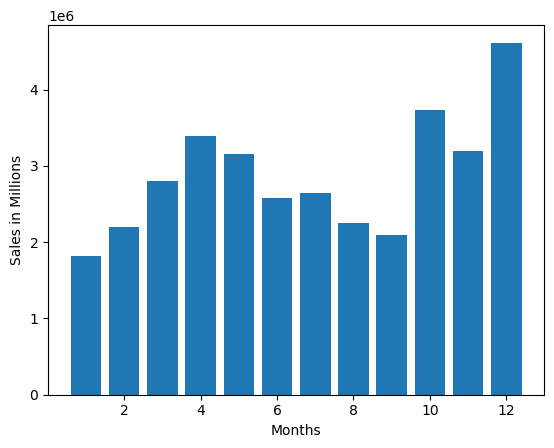

In [20]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 13)

plt.bar(months, results)
plt.xlabel('Months')
plt.ylabel('Sales in Millions')
plt.show()

## Q: ***Which state made the most sales?***

### adding a 'state' column

In [21]:
df['Purchase Address'].str[-8:-6]

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
186845    CA
186846    CA
186847    CA
186848    CA
186849    CA
Name: Purchase Address, Length: 185950, dtype: object

In [22]:
df['State'] = df['Purchase Address'].str[-8:-6]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,MA
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,CA


### grouping by states and evaluating the data

In [23]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False)

State
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Sales, dtype: float64

In [24]:
results = df.groupby('State')['Sales'].sum()
results

State
CA    13714774.71
GA     2795498.58
MA     3661642.01
ME      449758.27
NY     4664317.43
OR     1870732.34
TX     4587557.15
WA     2747755.48
Name: Sales, dtype: float64

### plotting a bar graph

<BarContainer object of 8 artists>

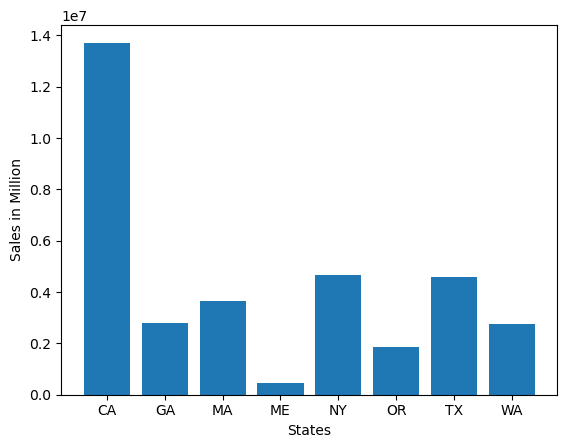

In [25]:
states = results.index
sales = results.values
plt.xlabel('States')
plt.ylabel('Sales in Million')
plt.bar(states, sales)

## Q: ***Which city made the most sales?***

### adding a 'city' column

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,MA
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,CA


In [27]:
def get_city(x):
    return x.split(',')[1].strip()
def get_state(x):
    return x.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)}, {get_state(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA"


In [28]:
df.City.unique()

array(['Dallas, TX', 'Boston, MA', 'Los Angeles, CA', 'San Francisco, CA',
       'Seattle, WA', 'Atlanta, GA', 'New York City, NY', 'Portland, OR',
       'Austin, TX', 'Portland, ME'], dtype=object)

### grouping by city and plotting the graph

In [29]:
results = df.groupby('City')['Sales'].sum()
results

City
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Sales, dtype: float64

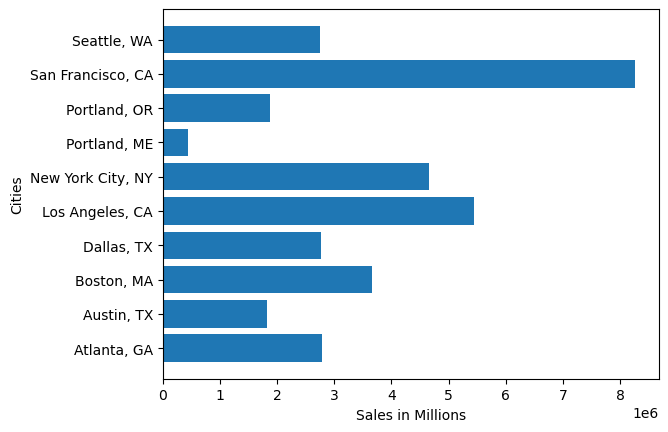

In [30]:
cities, sales = results.index, results.values
plt.barh(cities, sales)
plt.xlabel('Sales in Millions')
plt.ylabel('Cities')
plt.show()

## Q: ***What time should be considered as the best time to display advertisements?***

### adding columns hour and minute

In [31]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,TX,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,MA,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",9,27


### grouping by hour and calculating total sales

In [32]:
results = df.groupby('Hour')['Sales'].sum()
results.sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

### grouping by hour and calculating orders placed

In [33]:
results2 = df.groupby('Hour').count()
results2

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State,City,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


### plotting the graph

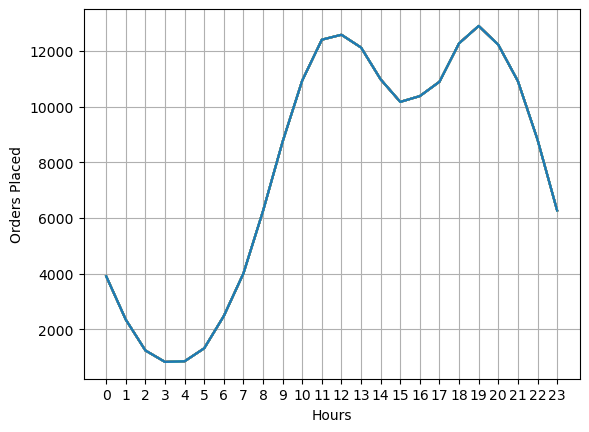

In [34]:
hours = results.index
sales = results.values
plt.plot(results2.index, results2.values)
plt.xlabel('Hours')
plt.ylabel('Orders Placed')
plt.xticks(hours)
plt.grid()
plt.show()

## Q: ***What products are often sold together?***

### keeping duplicates of order IDs

In [35]:
new_df = df[df['Order ID'].duplicated(keep=False)].copy()
new_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,State,City,Hour,Minute
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",14,38
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",19,42
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,CA,"Los Angeles, CA",19,42
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,MA,"Boston, MA",11,31
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,MA,"Boston, MA",11,31
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4.0,CA,"San Francisco, CA",17,0
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4.0,CA,"San Francisco, CA",17,0
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4.0,NY,"New York City, NY",11,7
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4.0,NY,"New York City, NY",11,7


### grouping by order ID, taking the products for each order ID and joining them

In [36]:
new_df['Grouped Product'] = new_df.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))
new_df = new_df[['Order ID', 'Grouped Product']]
new_df

,Order ID,Grouped Product
3,176560,"Google Phone, Wired Headphones"
4,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
19,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...
186792,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,"Google Phone, USB-C Charging Cable"


### displaying the descending values

In [37]:
new_df.groupby('Grouped Product').count().sort_values(by='Order ID', ascending=False).head(15)

,Order ID
Grouped Product,
"iPhone, Lightning Charging Cable",1764
"Google Phone, USB-C Charging Cable",1712
"iPhone, Wired Headphones",722
"Vareebadd Phone, USB-C Charging Cable",624
"Google Phone, Wired Headphones",606
"iPhone, Apple Airpods Headphones",572
"Google Phone, Bose SoundSport Headphones",322
"Google Phone, USB-C Charging Cable, Wired Headphones",231
"Vareebadd Phone, Wired Headphones",208


## Q: ***What product sold the most? Why?***

### calculating quantity ordered and prices for every product

In [38]:
results = df.groupby('Product')['Quantity Ordered'].sum()
products, quantity = results.index, results.values

In [39]:
results = df.groupby(['Product'])['Price Each'].mean()
products2, prices = results.index, results.values

### plotting a combined graph to visualise quantity vs price for each product

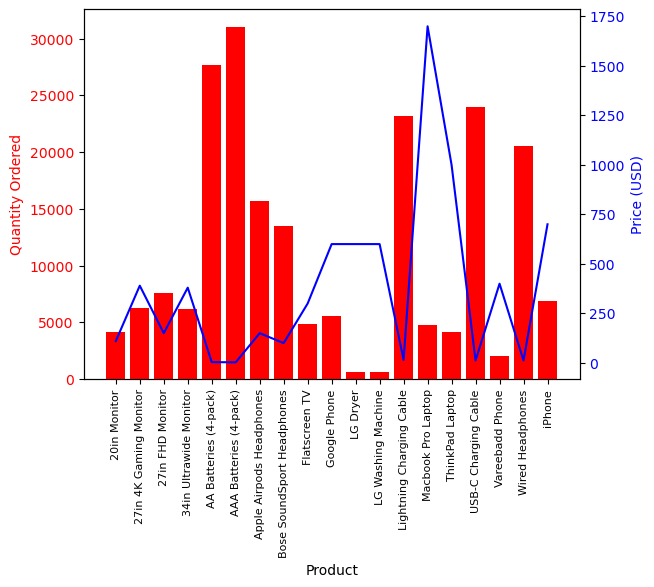

In [40]:
fig, ax1 = plt.subplots()
plt.xlabel('Product')
color='red'
ax1.set_ylabel('Quantity Ordered', color=color)
ax1.bar(products, quantity, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(products, rotation='vertical', size=8) 


ax2 = ax1.twinx()  
color='blue'
ax2.set_ylabel('Price (USD)', color=color)
ax2.plot(products2, prices, color=color) 
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

# we can see that the products having lesser price have been sold the most thus
# sales is directly linked to prices of the products